In [230]:
import urllib3

def get_request(uri):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    httpPool = urllib3.PoolManager()
    return httpPool.request('GET',uri,fields=None,headers=h)

In [231]:
import json

from bs4 import BeautifulSoup


with open('URL.json',"r") as f:
    urls = json.load(f)

DATA = list(map(lambda x: [x['name'],x['URL'],x['HTML'],x['class']],urls['periodicos']))

textos=[]
longitudEnlace={}
datos={}
for index,dato in enumerate(DATA):
    soup = BeautifulSoup(get_request(dato[1]).data,'html.parser')
    enlace={}
    for text in soup.find_all(dato[2],{"class":dato[3]}):
        texto = text.text.replace("\n","")
        texto = texto.replace("\r","")
        texto = texto.replace("\t","")
        enlace[texto]={"PesoAbsoluto":0,"PesoRelativo": 0} 
    datos[dato[1]]=enlace
datos

{'http://www.lavozdegalicia.com': {'El plan de refuerzo de matemáticas y lectura llegará a todos los colegios en primaria, ESO, FP básica y bachillerato': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'Furor por los furanchos en las Rías Baixas ya en enero: «A xente toleou este ano. Abrín e en dez días vendín todo o viño que tiña»': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'El juez impide que la Seguridad Social obligue a una limpiadora con cáncer a volver a trabajar': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'Le niegan el título de Enfermería en A Coruña al tener antecedentes por delitos sexuales': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'El juez propone juzgar a Rubiales por el beso a Jennifer Hermoso': {'PesoAbsoluto': 0,
   'PesoRelativo': 0},
  'Tres personas mueren y otras 18 resultan heridas en los accidentes múltiples 

In [232]:
import nltk
from nltk.corpus import stopwords

#nltk.download('stopwords')

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [233]:
from copy import deepcopy
import re

regex = "|".join(stop_words)
recorre = deepcopy(datos)
for url,value in recorre.items():
    frases={}
    for frase,value in value.items():
        viejaFrase=deepcopy(frase)
        fraseNueva = re.sub(f"\\b({regex})\\b", " ", viejaFrase)
        frasecompleta = fraseNueva.strip ()
        palabras = frasecompleta.split ()
        frasecompleta = " ".join([re.sub(r'[^\w\s]$', '', p) for p in palabras if len(re.sub(r'[^\w\s]$', '', p)) > 3])
        value["FraseFiltro"] = frasecompleta
        datos[url][viejaFrase] = value
    

In [234]:
datos

{'http://www.lavozdegalicia.com': {'El plan de refuerzo de matemáticas y lectura llegará a todos los colegios en primaria, ESO, FP básica y bachillerato': {'PesoAbsoluto': 0,
   'PesoRelativo': 0,
   'FraseFiltro': 'plan refuerzo matemáticas lectura llegará colegios primaria básica bachillerato'},
  'Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»': {'PesoAbsoluto': 0,
   'PesoRelativo': 0,
   'FraseFiltro': 'Dirigentes PSOE reprenden Page Feijoo elogia «presidentes autonómicos callan'},
  'Furor por los furanchos en las Rías Baixas ya en enero: «A xente toleou este ano. Abrín e en dez días vendín todo o viño que tiña»': {'PesoAbsoluto': 0,
   'PesoRelativo': 0,
   'FraseFiltro': 'Furor furanchos Rías Baixas enero xente toleou Abrín días vendín viño tiña'},
  'El juez impide que la Seguridad Social obligue a una limpiadora con cáncer a volver a trabajar': {'PesoAbsoluto': 0,
   'PesoRelativo': 0,
   'FraseFiltro': 'juez impide Segur

In [235]:
from copy import deepcopy

frecuencias = {}

# Recorrer el diccionario principal y obtener las frases filtro y sus palabras
for clave, valor in datos.items():
  for subclave, subvalor in valor.items():
    frase = subvalor['FraseFiltro']
    # Eliminar los caracteres especiales de la frase usando re.sub
    frase = re.sub(r"^\W", "", frase)
    # Convertir la frase a minúsculas usando el método lower()
    frase = frase.lower()
    # Obtener una lista de palabras de la frase usando el método split
    palabras_frase = frase.split()
    # Recorrer las palabras de la frase y actualizar las frecuencias en el diccionario
    for palabra in palabras_frase:
      if palabra in frecuencias:
        frecuencias[palabra] += 1
      else:
        frecuencias[palabra] = 1

# Recorrer de nuevo el diccionario principal y calcular el PesoAbsoluto y el PesoRelativo de cada frase
for clave, valor in datos.items():
  for subclave, subvalor in valor.items():
    frase = subvalor['FraseFiltro']
    # Eliminar los caracteres especiales de la frase usando re.sub
    frase = re.sub(r"^\W", "", frase)
    # Convertir la frase a minúsculas usando el método lower()
    frase = frase.lower()
    # Obtener una lista de palabras de la frase usando el método split
    palabras_frase = frase.split()
    # Inicializar una variable para almacenar la suma de las frecuencias
    suma = 0
    # Recorrer las palabras de la frase y sumar sus frecuencias
    for palabra in palabras_frase:
      suma += frecuencias[palabra]
    # Calcular el promedio de las frecuencias dividiendo la suma por el número de palabras
    promedio = 0 if suma==0 else suma / len(palabras_frase)
    # Guardar el promedio como el valor de 'PesoAbsoluto' en el subdiccionario correspondiente
    subvalor['PesoAbsoluto'] = promedio

frecuencias

{'plan': 5,
 'refuerzo': 2,
 'matemáticas': 2,
 'lectura': 2,
 'llegará': 1,
 'colegios': 4,
 'primaria': 1,
 'básica': 1,
 'bachillerato': 2,
 'dirigentes': 1,
 'psoe': 5,
 'reprenden': 1,
 'page': 4,
 'feijoo': 2,
 'elogia': 1,
 '«presidentes': 1,
 'autonómicos': 1,
 'callan': 1,
 'furor': 1,
 'furanchos': 1,
 'rías': 1,
 'baixas': 1,
 'enero': 12,
 'xente': 1,
 'toleou': 1,
 'abrín': 1,
 'días': 4,
 'vendín': 1,
 'viño': 1,
 'tiña': 1,
 'juez': 12,
 'impide': 2,
 'seguridad': 1,
 'social': 2,
 'obligue': 1,
 'limpiadora': 1,
 'cáncer': 2,
 'volver': 2,
 'trabajar': 1,
 'niegan': 1,
 'título': 1,
 'enfermería': 1,
 'coruña': 4,
 'tener': 1,
 'antecedentes': 1,
 'delitos': 3,
 'sexuales': 2,
 'propone': 5,
 'juzgar': 4,
 'rubiales': 5,
 'beso': 4,
 'jennifer': 1,
 'hermoso': 6,
 'tres': 7,
 'personas': 5,
 'mueren': 2,
 'resultan': 2,
 'heridas': 2,
 'accidentes': 4,
 'múltiples': 2,
 'registrados': 1,
 'causa': 1,
 'niebla': 3,
 'asfixia': 5,
 'nitrógeno': 3,
 'nuevo': 13,
 'método':

In [236]:
maximo = max(subvalor['PesoAbsoluto'] for valor in datos.values() for subvalor in valor.values())
for clave, valor in datos.items():
  for subclave, subvalor in valor.items():
    # Dividir el PesoAbsoluto por el valor máximo y guardar el resultado como el valor de 'PesoRelativo' en el subdiccionario correspondiente
    subvalor['PesoRelativo'] = subvalor['PesoAbsoluto'] / maximo
datos

{'http://www.lavozdegalicia.com': {'El plan de refuerzo de matemáticas y lectura llegará a todos los colegios en primaria, ESO, FP básica y bachillerato': {'PesoAbsoluto': 2.2222222222222223,
   'PesoRelativo': 0.15873015873015875,
   'FraseFiltro': 'plan refuerzo matemáticas lectura llegará colegios primaria básica bachillerato'},
  'Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»': {'PesoAbsoluto': 1.8888888888888888,
   'PesoRelativo': 0.1349206349206349,
   'FraseFiltro': 'Dirigentes PSOE reprenden Page Feijoo elogia «presidentes autonómicos callan'},
  'Furor por los furanchos en las Rías Baixas ya en enero: «A xente toleou este ano. Abrín e en dez días vendín todo o viño que tiña»': {'PesoAbsoluto': 2.1666666666666665,
   'PesoRelativo': 0.15476190476190474,
   'FraseFiltro': 'Furor furanchos Rías Baixas enero xente toleou Abrín días vendín viño tiña'},
  'El juez impide que la Seguridad Social obligue a una limpiadora con cán

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'comentarios'),
  Text(1, 0, 'años'),
  Text(2, 0, 'barça'),
  Text(3, 0, 'madrid'),
  Text(4, 0, 'nueva'),
  Text(5, 0, 'real'),
  Text(6, 0, 'nuevo'),
  Text(7, 0, 'euros'),
  Text(8, 0, 'tras'),
  Text(9, 0, 'enero')])

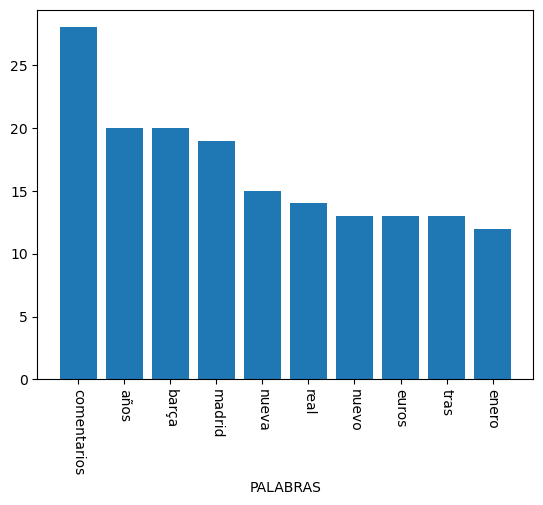

In [237]:
import matplotlib.pyplot as plt
from pandas import DataFrame

diccionario_ordenado = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)
diez_mas_grandes = dict(diccionario_ordenado[:10])

plt.bar(diez_mas_grandes.keys(),diez_mas_grandes.values())
plt.xlabel("PALABRAS")
plt.xticks(rotation=-90)

In [247]:
# Crear una copia del diccionario original
diccionario = deepcopy(datos)
noticias_ordenadas = {}
noticiasOrdenadasPesoRelativo={}
# Obtener la url del diccionario
for url in diccionario.keys():

  # Obtener el subdiccionario asociado a la url
  subdiccionario = diccionario[url]

  # Crear una lista vacía para almacenar las segundas keys y sus pesos relativos
  lista = []

  # Recorrer el subdiccionario y añadir las segundas keys y sus pesos relativos a la lista

  for key, value in subdiccionario.items():
    lista.append((key, value['PesoRelativo']))

  for key, pesoRelativo in lista:
    noticias_ordenadas[key]=pesoRelativo
    noticiasOrdenadasPesoRelativo[key]={url:pesoRelativo}

{'El plan de refuerzo de matemáticas y lectura llegará a todos los colegios en primaria, ESO, FP básica y bachillerato': {'http://www.lavozdegalicia.com': 0.15873015873015875},
 'Dirigentes del PSOE reprenden a Page y Feijoo elogia a los «presidentes autonómicos que no se callan»': {'http://www.lavozdegalicia.com': 0.1349206349206349},
 'Furor por los furanchos en las Rías Baixas ya en enero: «A xente toleou este ano. Abrín e en dez días vendín todo o viño que tiña»': {'http://www.lavozdegalicia.com': 0.15476190476190474},
 'El juez impide que la Seguridad Social obligue a una limpiadora con cáncer a volver a trabajar': {'http://www.lavozdegalicia.com': 0.19047619047619047},
 'Le niegan el título de Enfermería en A Coruña al tener antecedentes por delitos sexuales': {'http://www.lavozdegalicia.com': 0.125},
 'El juez propone juzgar a Rubiales por el beso a Jennifer Hermoso': {'http://www.lavozdegalicia.com': 0.37755102040816324},
 'Tres personas mueren y otras 18 resultan heridas en lo

In [245]:
noticias_ordenadas = dict(sorted(noticias_ordenadas.items(), key=lambda x: x[1],reverse=True))

**Librería para manejo de HTML**

In [240]:
#!conda install -y -c conda-forge airium
!#conda install -y pymysql

"#conda" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [246]:
import time
from airium import Airium
from pymysql import Time

a = Airium()


a('<!DOCTYPE html>')
with a.html(lang="pl"):
    with a.head():
        a.meta(charset="utf-8")
        a.title(_t="Página de noticias")
    with a.body():
        for key,value in noticias_ordenadas.items():
            with a.p(style=f"font-size:{value+1}em;"):
                a(key)

html = str(a)  # casting to string extracts the value
# or directly to UTF-8 encoded bytes:
html_bytes = bytes(a)  # casting to bytes is a shortcut to str(a).encode('utf-8')

with open(f"resultado-{time.localtime().tm_year}-{time.localtime().tm_mon}-{time.localtime().tm_mday}.html","w+") as f:
    f.write(html)


In [242]:
longitudEnlace

{}

In [243]:
list(frasesTotalValor.items())[:20]

NameError: name 'frasesTotalValor' is not defined